Importando as bibliotecas

In [1]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.5 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
import matplotlib.pyplot as plt

Leitura do arquivo CSV

In [16]:
#Baixa o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

Realizando a normalização dos dados

In [17]:

targets = df[0]
#Retira a coluna de label e convert o data frame para NumPy array
df = df.drop(columns=[0])
data = df.values

#Realiza a normalização dos dados utilizando o Z-score
X = data.astype(float)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


#Utiliza o PCA para transormar o array de 14 variáveis em um de 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
df_normalized = pd.DataFrame(X_pca)
x = pd.DataFrame(X)

#Usando o método Elbow para encontrar o valor ideal de clusteres
### Ele já retorna o melhor valor para o cluster, como pode ser visto no gráfico abaixo, o melhor valor para K é o 3 

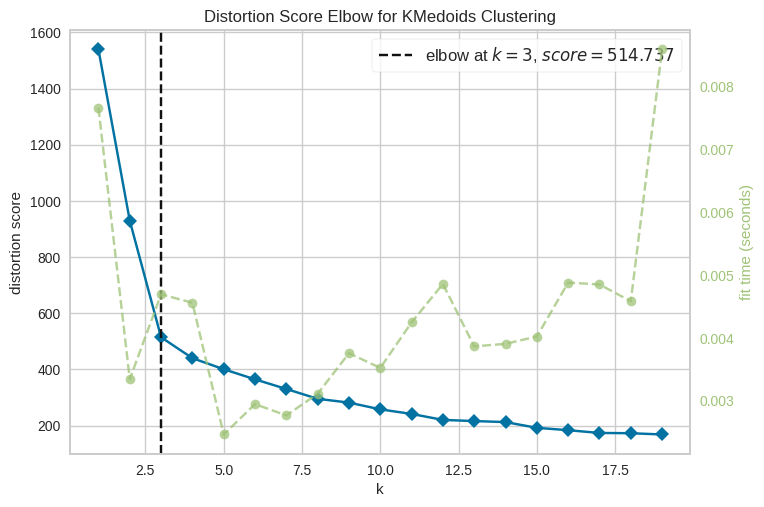

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_normalized) 
visualizer.poof()

#Calculo Sillhoutte e Plot do gráfico
Sabendo o resultado do Elbow, vamos executar o Kmedoid com outros parâmetros afim de verificar o resultado obitido pelo elbow.

Para isso, utilizaremos 6 valores para k:
1. K = 3 utilizando os valores transformados pelo PCA
2. K = 3 utilizando as 13 variáveis do dataset
3. K = 3 utilizando o método PAM (Que realiza um cálculo mais preciso)
4. K = 3 utilizando uma inicialização aleatória dos clusters
5. K = 9 utilizando os valores transformados pelo PCA
6. K = 13 utilizando os valores transformados pelo PCA

Valor da Silhouette 3 clusters: 0.4530804270167602
Valor da Silhouette 3 clusters without data transformation: 0.26597740204536796
Valor da Silhouette 3 clusters with PAM method: 0.4530804270167602
Valor da Silhouette 3 clusters bad: 0.4530804270167602
Valor da Silhouette 9 clusters: 0.223303426319515
Valor da Silhouette 13 clusters: 0.19695692847621843


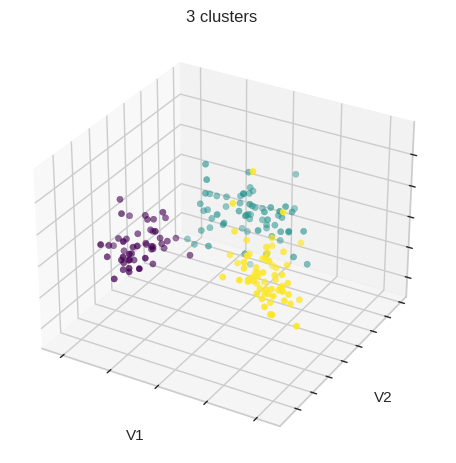

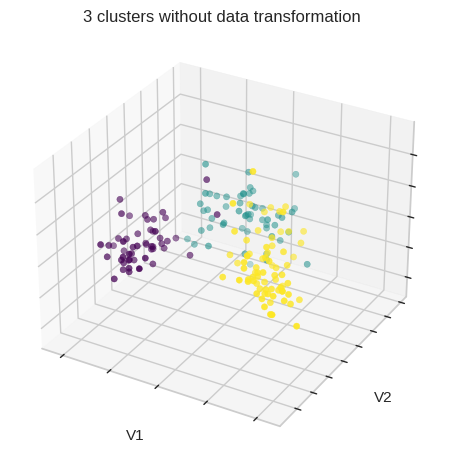

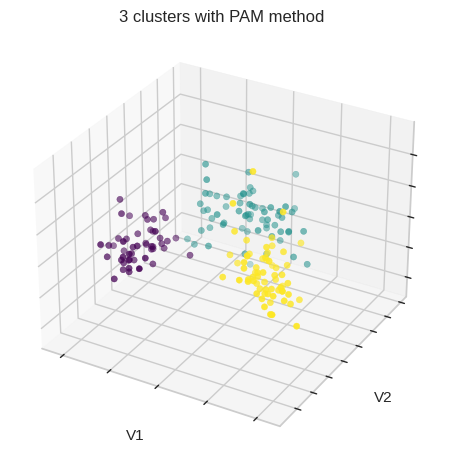

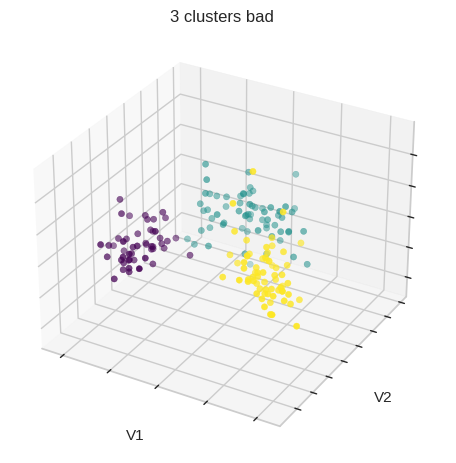

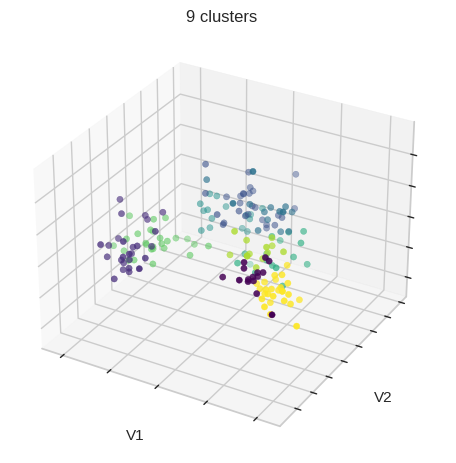

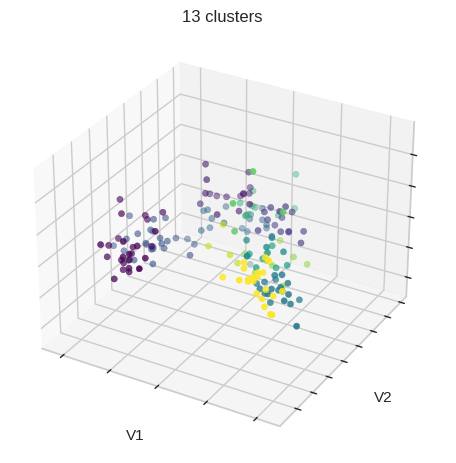

In [19]:
estimators = [
    ("3 clusters", KMedoids(n_clusters=3), df_normalized),
    ("3 clusters without data transformation", KMedoids(n_clusters=3), X),
    ("3 clusters with PAM method", KMedoids(n_clusters=3, method='pam'), df_normalized),
    ("3 clusters bad", KMedoids(n_clusters=3, random_state=1, init= 'random'), df_normalized),
    ("9 clusters", KMedoids(n_clusters=9), df_normalized),
    ("13 clusters", KMedoids(n_clusters=13), df_normalized)
]

fignum = 1
for name, model, data in estimators:
  #Calcul Sillhoutte
  kmedoids = model.fit(data)
  labels = kmedoids.labels_
  print(f'Valor da Silhouette {name}: {metrics.silhouette_score(data, labels)}')

  #Plot Graph
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_normalized[0], df_normalized[1], df_normalized[2],c=labels, cmap="viridis")
  ax.xaxis.set_ticklabels([])
  ax.yaxis.set_ticklabels([])
  ax.zaxis.set_ticklabels([])
  ax.set_xlabel("V1")
  ax.set_ylabel("V2")
  ax.set_zlabel("V3")
  ax.set_title(name)

  fignum = fignum + 1

plt.show()